In [1]:
import TMQGP as tm
import QuarkTM
import tqdm
from numpy import *

import h5py

import matplotlib
matplotlib.style.use('publication23')

In [2]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [3]:
df = h5py.File('/home/const/Numerics/TMQGP/ipy/TMQGP/test/FitChi2/4ch_HI/0.00/data_single_170.hdf5')

Gtab = array(df['Q']['G'])
Stab = array(df['Q']['S'])

mQ = df.attrs['mQ']

In [4]:
pt1 = QuarkTM.Particle(mQ, qrange, erange, Gtab=Gtab, S=Stab)

In [ ]:
T = 0.2

In [8]:
T = df.attrs['T']

In [ ]:
# ch = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=2, G2_mode=0, G=df.attrs['G'], screen=df.attrs['screen'], 
#                     L=df.attrs['L'])

# np.savetxt('G2_test.dat', ch.G2)

In [30]:
G2 = np.loadtxt('G2_test.dat', dtype=complex)
ch = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=2, G2_mode=0, G=df.attrs['G'], screen=df.attrs['screen'], 
                    L=df.attrs['L'], G2=G2)

/home/const/Numerics/TMQGP/py/QuarkTM.py:362: RuntimeWarning: divide by zero encountered in divide
  np.ascontiguousarray(np.real(1/self.G2)), np.ascontiguousarray(np.imag(1/self.G2)), 'real')
/home/const/Numerics/TMQGP/py/QuarkTM.py:362: RuntimeWarning: invalid value encountered in divide
  np.ascontiguousarray(np.real(1/self.G2)), np.ascontiguousarray(np.imag(1/self.G2)), 'real')
/home/const/Numerics/TMQGP/py/QuarkTM.py:364: RuntimeWarning: divide by zero encountered in divide
  np.ascontiguousarray(np.real(1/self.G2)), np.ascontiguousarray(np.imag(1/self.G2)), 'imag')
/home/const/Numerics/TMQGP/py/QuarkTM.py:364: RuntimeWarning: invalid value encountered in divide
  np.ascontiguousarray(np.real(1/self.G2)), np.ascontiguousarray(np.imag(1/self.G2)), 'imag')


In [31]:
ch.populate_T_fast()

In [32]:
erange_df = df.attrs['erange']

[]

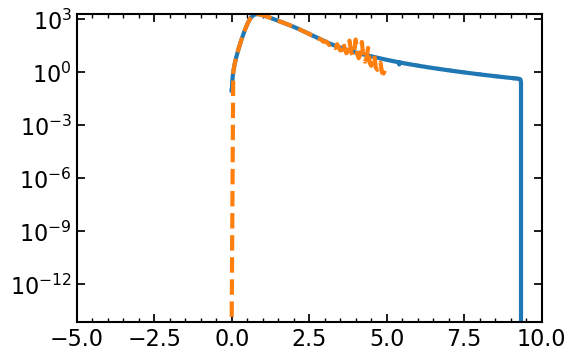

In [33]:
plt.plot(ch.erange, -imag(ch.TM[:, 0]))
plt.plot(erange_df, -imag(df['TM']['qa1']['0'][:, 0]), ls='--')

plt.semilogy()

In [19]:
ch.iImT(0.5, 0.5)

0.0

In [25]:
import sys

In [27]:
sys.getsizeof(ch.TM) / 1024**2

11.474746704101562

In [36]:
peaks = []

for g in G2.transpose():
    peak = ch.erange[np.argmin(imag(g))]
    peaks += [peak]

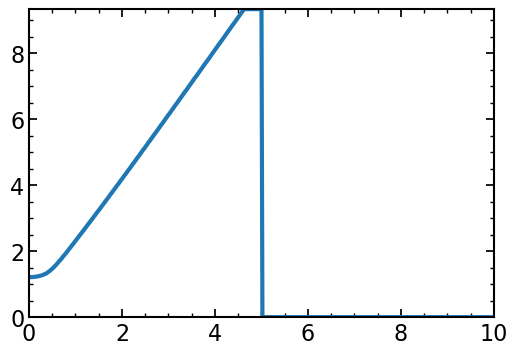

In [37]:
plt.plot(ch.qrange, peaks)

In [38]:
eps1 = sqrt(mQ**2 + qrange**2)
iEps1 = tm.Interpolator(qrange, eps1, 'cubic')

In [40]:
s1 = array([tm.sigma_ff_onshell(e, 0, T, ch.iImT, pt1.R, iEps1, iEps1) for e in erange])

[]

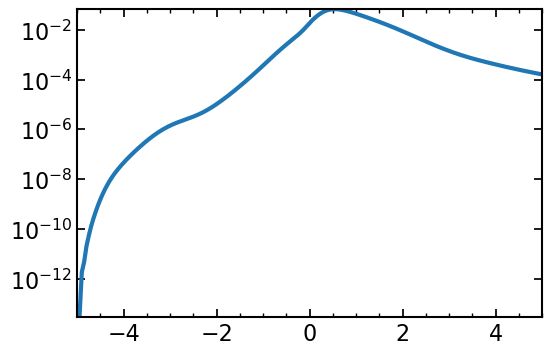

In [43]:
plt.plot(erange, -s1)

plt.semilogy()